In [2]:
#3.2 
import numpy as np

def clgs(A):
    B = A.copy()
    [m,n] = B.shape
    V = B
    Q = np.eye(m,n)
    R = np.zeros((n,n))
    for j in range(0,n):
        for i in range(0,j):
            R[i,j] = np.dot(Q[:,i], B[:,j])
            V[:,j] = V[:,j] - R[i,j]*Q[:,i]
        R[j,j] = np.linalg.norm(V[:,j])
        Q[:,j] = V[:,j]/R[j,j]
    return Q, R

def mgs(A):
    B = A.copy()
    [m,n] = B.shape
    Q = B
    R = np.zeros((n,n))
    for i in range(0,n-1):
        R[i,i] = np.linalg.norm(Q[:,i])
        Q[:,i] = Q[:,i]/R[i,i]
        R[i,i+1:n] = np.dot(Q[:,i], Q[:,i+1:n])
        Q[:,i+1:n] = Q[:,i+1:n] - np.outer(Q[:,i], R[i,i+1:n])
    R[n-1,n-1] = np.linalg.norm(Q[:,n-1])
    Q[:,n-1] = Q[:,n-1]/R[n-1,n-1]
    return Q, R
                                                
def qrhouse(A):
    B = A.copy()
    [m,n] = B.shape
    R = B
    V = np.zeros((m,n))
    for k in range(0,min(m-1,n)):
        x = R[k:m,k]
        v = x + np.sign(x[0])*np.linalg.norm(x)*np.eye(1,len(x))
        V[k:m,k] = v
        R[k:m,k:n] = R[k:m,k:n] - np.outer((2*v),np.dot(v,R[k:m,k:n]))/np.dot(v,np.transpose(v))
    R = np.triu(R[0:n,0:n])
    return V, R

def formQ(V):
    [m,n] = V.shape
    Q = np.eye(m)
    for j in range(min(m-2,n-1),-1,-1):
        v = V[:,j]
        Q = Q - np.outer((2*v),np.dot(v,Q))/np.dot(v,np.transpose(v))
        Q = Q[0:m,0:n]
    return Q

In [25]:
A = np.array([[12., -51., 4.],
             [6., 167., -68.],
             [-4., 24., -41.]])
Q,R = clgs(A)
print("Q =\n", Q, "\n", "R =\n", R)

A = np.array([[12., -51., 4.],
             [6., 167., -68.],
             [-4., 24., -41.]])
Q,R = mgs(A)
print("Q =\n", Q, "\n", "R =\n", R)

Q =
 [[ 0.85714286 -0.39428571 -0.33142857]
 [ 0.42857143  0.90285714  0.03428571]
 [-0.28571429  0.17142857 -0.94285714]] 
 R =
 [[ 14.  21. -14.]
 [  0. 175. -70.]
 [  0.   0.  35.]]
Q =
 [[ 0.85714286 -0.39428571 -0.33142857]
 [ 0.42857143  0.90285714  0.03428571]
 [-0.28571429  0.17142857 -0.94285714]] 
 R =
 [[ 14.  21. -14.]
 [  0. 175. -70.]
 [  0.   0.  35.]]


In [23]:
A = np.array([[12., -51., 4.],
             [6., 167., -68.],
             [-4., 24., -41.]])
V,R = qrhouse(A)
Q = formQ(V)
print("Q =\n", Q, "\n", "R =\n", R)

Q =
 [[-0.85714286  0.39428571  0.33142857]
 [-0.42857143 -0.90285714 -0.03428571]
 [ 0.28571429 -0.17142857  0.94285714]] 
 R =
 [[ -14.  -21.   14.]
 [   0. -175.   70.]
 [   0.    0.  -35.]]


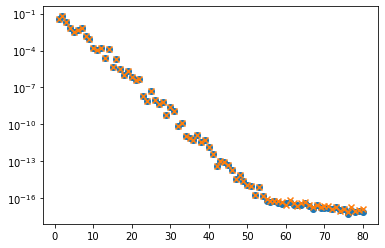

In [103]:
import matplotlib.pyplot as plt

U,X = np.linalg.qr(np.random.randn(80,80))
V,X = np.linalg.qr(np.random.randn(80,80))
J = range(1,81)
J = np.array(J)
S = np.diag(2.**(-J))
A = np.dot(U, np.dot(S, V))
Qc, Rc = clgs(A)
Qm, Rm = mgs(A)

x = J
y = np.array([])
z = np.array([])
for j in range(0,len(Rc)):
    y = np.append(y,Rc[j,j])
for i in range(0,len(Rm)):
    z = np.append(z,Rm[i,i])
fig = plt.figure()
# plt.ylim(10**(-25))
plt.scatter(x,y, marker = 'o')
plt.scatter(x,z, marker = 'x')
plt.semilogy()
plt.show()


In [176]:
# 3.2. b
A = np.array([[.70000, .70711],
             [.70001, .70711]])
Qm, Rm = mgs(A)
V, R = qrhouse(A)
Q = formQ(V)
print(np.linalg.norm(np.dot(np.transpose(Q),Q) - np.eye(2)))
print(np.linalg.norm(np.dot(np.transpose(Qm),Qm) - np.eye(2)))

2.3411870786352597e-16
3.254738863228859e-11


In [29]:
# 3.3
def qrgivens(A):
    [m,n] = A.shape
    Q = np.eye(m)
    R = A
    
    for j in range(0,n):
        for i in range(m-1,j,-1):
            G = np.eye(m)
            print(R[i-1,j])
            print(R[i,j])
            c,s = givensrotation(R[i-1,j],R[i,j])
            G[i-1,i-1:i+1] = [c, -s]
            G[i,i-1:i+1] = [s, c]
            R = np.transpose(G).dot(R)
            Q = Q.dot(G)
    return Q, R

def givensrotation(a,b):
    if b == 0:
        c = 1
        s = 0
    else:
        if np.abs(b) > np.abs(a):
            r = a/b
            s = 1/np.sqrt(1+r**2)
            c = s*r
        else:
            r = b/a
            c = 1/np.sqrt(1+r**2)
            s = c*r
    return c,s    
        

In [30]:
A = np.array([[12., -51., 4.],
             [6., 167., -68.],
             [-4., 24., -41.]])
Q,R = qrgivens(A)
print("Q =\n", Q, "\n", "R =\n", R)
print(Q.dot(R))

6.0
-4.0
12.0
7.211102550927979
133.96009738839282
112.60413983372152
Q =
 [[ 0.85714286 -0.39428571  0.33142857]
 [ 0.42857143  0.90285714 -0.03428571]
 [-0.28571429  0.17142857  0.94285714]] 
 R =
 [[ 1.40000000e+01  2.10000000e+01 -1.40000000e+01]
 [ 0.00000000e+00  1.75000000e+02 -7.00000000e+01]
 [ 0.00000000e+00  1.95202322e-15 -3.50000000e+01]]
[[ 12. -51.   4.]
 [  6. 167. -68.]
 [ -4.  24. -41.]]


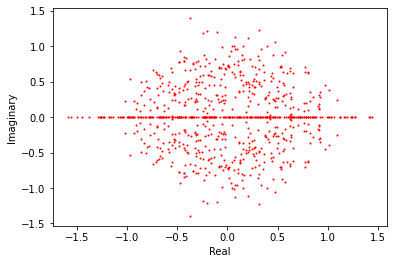

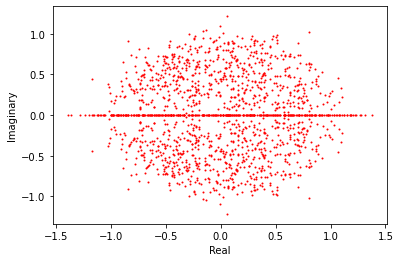

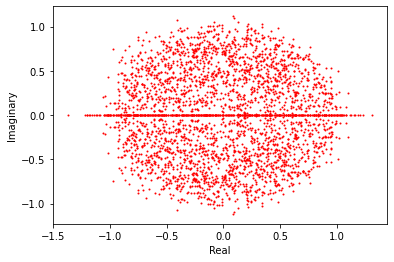

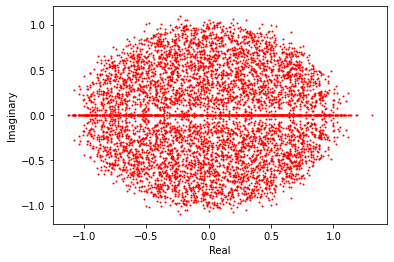

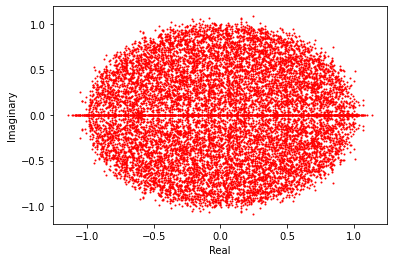

In [89]:
# 4.3.a
m = [8, 16, 32, 64, 128]
for j in range(len(m)):
    plt.figure()
    for i in range(0,100):
        A = np.random.randn(m[j],m[j])/np.sqrt(m[j])
        w,v = np.linalg.eig(A)
        X = [x.real for x in w]
        Y = [x.imag for x in w]
        plt.scatter(X,Y,color='red', s=1)
    plt.ylabel('Imaginary')
    plt.xlabel('Real')
    plt.show()
# 고유치들은 x축(real)을 기준으로 대칭이며, m의 값이 커짐에 따라, 고유치의 plot이 
# 원점을 중심으로 하고 반지름이 1인, 속이 찬 원의 형태에 가까워 지는 것을 확인할 수 
# 있다. m이 무한히 커짐에따라 spectral radius는 원의 반지름인 1에 가까워진다. 

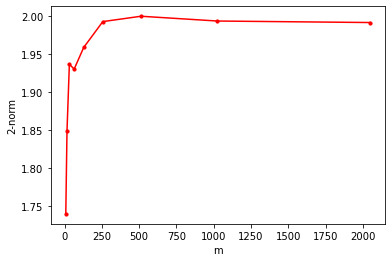

In [85]:
# 4.3.b
m = np.array([])
n2 = np.array([])
for j in range(9):
    m = np.append(m, 2**(3+j))
    A = np.random.randn(int(m[j]),int(m[j]))/np.sqrt(m[j])
    n2 = np.append(n2, np.linalg.norm(A, ord=2))
plt.scatter(m, n2, color='red', s=10)
plt.plot(m, n2, color='red')
plt.ylabel('2-norm')
plt.xlabel('m')
plt.show()
# 임의의 행렬의 2-norm은 m이 커짐에 따라 2에 가까워지는 것으로 보인다.
# 따라서, 문제에서 주어진 부등식이 등식의 관계에 가까워지지 않는 것으로 보인다.


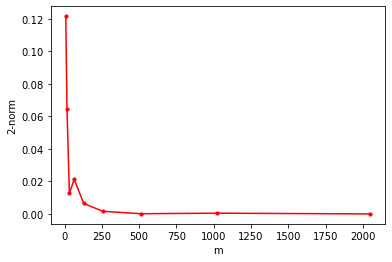

In [86]:
# 4.3.c
m = np.array([])
n2 = np.array([])
for j in range(7):
    m = np.append(m, 2**(3+j))
    A = np.random.randn(int(m[j]),int(m[j]))/np.sqrt(m[j])
    n2 = np.append(n2, np.linalg.norm(A, ord=-2))
plt.scatter(m, n2, color='red', s=10)
plt.plot(m, n2, color='red')
plt.ylabel('2-norm')
plt.xlabel('m')
plt.show()

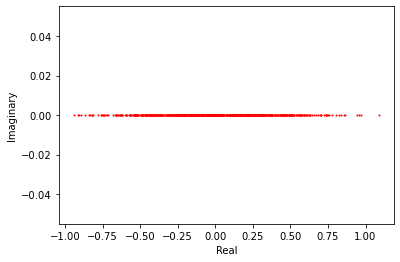

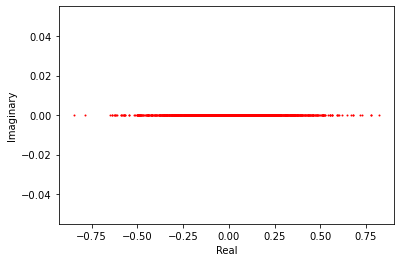

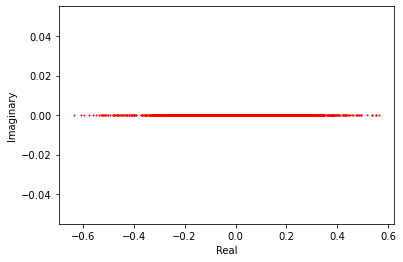

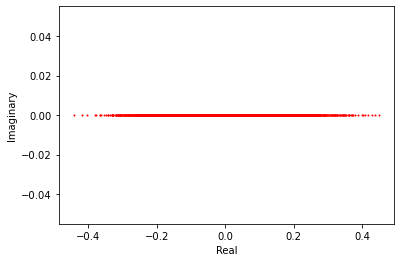

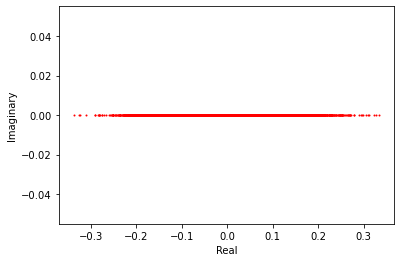

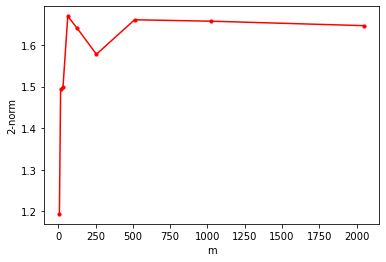

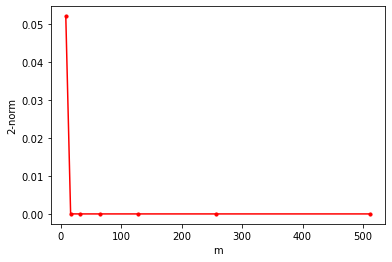

In [90]:
# 4.3.d
m = [8, 16, 32, 64, 128]
for j in range(len(m)):
    plt.figure()
    for i in range(0,100):
        A = np.random.randn(m[j],m[j])/np.sqrt(m[j])
        A = np.triu(A)
        w,v = np.linalg.eig(A)
        X = [x.real for x in w]
        Y = [x.imag for x in w]
        plt.scatter(X,Y,color='red', s=1)
    plt.ylabel('Imaginary')
    plt.xlabel('Real')
    plt.show()
    
m = np.array([])
n2 = np.array([])
for j in range(9):
    m = np.append(m, 2**(3+j))
    A = np.random.randn(int(m[j]),int(m[j]))/np.sqrt(m[j])
    A = np.triu(A)
    n2 = np.append(n2, np.linalg.norm(A, ord=2))
plt.scatter(m, n2, color='red', s=10)
plt.plot(m, n2, color='red')
plt.ylabel('2-norm')
plt.xlabel('m')
plt.show()

m = np.array([])
n2 = np.array([])
for j in range(7):
    m = np.append(m, 2**(3+j))
    A = np.random.randn(int(m[j]),int(m[j]))/np.sqrt(m[j])
    A = np.triu(A)
    n2 = np.append(n2, np.linalg.norm(A, ord=-2))
plt.scatter(m, n2, color='red', s=10)
plt.plot(m, n2, color='red')
plt.ylabel('2-norm')
plt.xlabel('m')
plt.show()

In [194]:
# 4.6
# a
m = 50
n = 12
t = np.linspace(0.,1.,m)
A = np.vander(t, increasing=True)
A = A[:,0:n]
b = np.cos(4*t)
x = np.linalg.solve(np.transpose(A).dot(A),np.transpose(A).dot(b))
print(x)


[ 9.99999996e-01  1.30523249e-06 -8.00004848e+00  6.97112148e-04
  1.06615014e+01  2.25265621e-02 -5.75146658e+00  1.17948482e-01
  1.46312601e+00  1.77058390e-01 -4.46070981e-01  1.01083120e-01]


In [115]:
# b
Q,R = mgs(A)
x = np.linalg.solve(R, np.transpose(Q).dot(b))
print(x)

[ 1.00000000e+00 -7.80741851e-07 -7.99996781e+00 -5.16377008e-04
  1.06709431e+01 -2.06445282e-02 -5.62772565e+00 -1.10758970e-01
  1.73549472e+00 -2.48104577e-02 -3.61374792e-01  8.57179143e-02]
(50, 12)


In [126]:
# c
V,R = qrhouse(A)
Q = formQ(V)
x = np.linalg.solve(R, np.transpose(Q).dot(b))
print(x)

[ 1.00000000e+00 -4.22743049e-07 -7.99998124e+00 -3.18763239e-04
  1.06694308e+01 -1.38202883e-02 -5.64707563e+00 -7.53160257e-02
  1.69360697e+00  6.03210744e-03 -3.74241703e-01  8.80405760e-02]


In [127]:
# d
Q,R = np.linalg.qr(A)
x = np.linalg.solve(R, np.transpose(Q).dot(b))
print(x)

[ 1.00000000e+00 -4.22743501e-07 -7.99998124e+00 -3.18763395e-04
  1.06694308e+01 -1.38202922e-02 -5.64707562e+00 -7.53160420e-02
  1.69360698e+00  6.03209551e-03 -3.74241698e-01  8.80405752e-02]


In [193]:
# e 
x = np.linalg.lstsq(A, b)
print(x[0])

[ 1.00000000e+00 -4.22743485e-07 -7.99998124e+00 -3.18763392e-04
  1.06694308e+01 -1.38202922e-02 -5.64707562e+00 -7.53160422e-02
  1.69360698e+00  6.03209519e-03 -3.74241698e-01  8.80405751e-02]


<ipython-input-193-9cb2a1260302>:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  x = np.linalg.lstsq(A, b)


In [195]:
# f
U,S,Vh = np.linalg.svd(A, full_matrices=True)
print(U.shape, S.shape, Vh.shape)
smat = np.zeros((m,n))
smat[:n,:n] = np.diag(S)
S = smat
y = np.linalg.lstsq(S,np.transpose(U).dot(b))[0]
x = Vh.dot(y)
print(x)

(50, 50) (12,) (12, 12)
[-7.21141147 -8.59378587  2.34084478  4.30625222  4.78501289 -2.30453607
 -1.85380569 -0.11494469 -0.09025277  2.22379561  4.21177306  3.0850394 ]


<ipython-input-195-3208b0924c62>:7: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  y = np.linalg.lstsq(S,np.transpose(U).dot(b))[0]
